# (02) VAE2D -- play

**Motivation**: My own implementation. Use this notebook for debugging purposes. <br>

In [1]:
# HIDE CODE


import os, sys
from copy import deepcopy as dc
from os.path import join as pjoin
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-MTMST/_extras')
fig_base_dir = pjoin(git_dir, 'jb-MTMST/figs')
tmp_dir = pjoin(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_MTMST'))
from model.vae2d import ConfigVAE, VAE
from model.utils_model import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
vae = self = VAE(ConfigVAE())

x = torch.randn((13, 2, 19, 19))
y, z, log_p, log_q, kl_all, kl_diag = vae(x)

In [3]:
vae.latent_scales()

[4, 8, 8, 16, 16, 16, 16]

In [3]:
log_q

tensor([-897.1010, -912.9154, -952.3799, -896.7639, -923.8005, -945.7508,
        -926.7120, -947.0673, -895.9904, -934.0933, -921.1526, -933.4215,
        -921.9557], grad_fn=<AddBackward0>)

In [4]:
vae.enc_sampler

ModuleList(
  (0): Conv2d(128, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Conv2d(128, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): Conv2d(128, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): Conv2d(128, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Conv2d(64, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): Conv2d(64, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): Conv2d(64, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): Conv2d(64, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [5]:
vae.dec_sampler

ModuleList(
  (0): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (1): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (2): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (3): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (4): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (5): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (6): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [6]:
y.shape

torch.Size([13, 2, 19, 19])

In [7]:
vae.print()

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |  4.9 Mil   |
|     ---     |    ---     |
|     stem    |    160     |
|     pre     |  112.1 K   |
|  enc_tower  |  3.3 Mil   |
|     enc0    |   16.5 K   |
| enc_sampler |   27.7 K   |
| dec_sampler |   2.6 K    |
|  dec_tower  |  1.4 Mil   |
|     post    |   39.9 K   |
|     out     |   17.0 K   |
+-------------+------------+

In [ ]:
+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |  5.3 Mil   |
|     ---     |    ---     |
|     stem    |    160     |
|     pre     |  112.1 K   |
|  enc_tower  |  3.3 Mil   |
|     enc0    |  262.3 K   |
| enc_sampler |   90.7 K   |
| dec_sampler |   90.1 K   |
|  dec_tower  |  1.4 Mil   |
|     post    |   39.9 K   |
|     out     |   17.0 K   |
+-------------+------------+ 

In [8]:
self.scales

[4, 8]

In [9]:
self.z0_sz, self.prior_ftr0.size()

([2, 4, 4], torch.Size([128, 4, 4]))

In [10]:
self.scales

[4, 8]

In [11]:
self.prior_ftr0.size(-1)

4

In [12]:
vae = self = VAE(ConfigVAE(compress=True))

In [13]:
self.z0_sz, self.prior_ftr0.size()

([2, 1, 1], torch.Size([128, 1, 1]))

In [14]:
x = torch.randn((13, 2, 19, 19))
y, log_p, log_q, kl_all, kl_diag = vae(x)

hi 0
torch.Size([13, 128, 1, 1])

top

idx = 0, z size: torch.Size([13, 2, 4, 4])

DecCombiner   ||   idx = 0,   s: torch.Size([13, 128, 4, 4]),   z: torch.Size([13, 2, 4, 4])

DecCombiner   ||   idx = 1,   s: torch.Size([13, 128, 4, 4]),   z: torch.Size([13, 2, 4, 4])

DecCombiner   ||   idx = 2,   s: torch.Size([13, 128, 4, 4]),   z: torch.Size([13, 2, 4, 4])

DecCombiner   ||   idx = 3,   s: torch.Size([13, 128, 4, 4]),   z: torch.Size([13, 2, 4, 4])

DecCombiner   ||   idx = 4,   s: torch.Size([13, 64, 8, 8]),   z: torch.Size([13, 2, 8, 8])

DecCombiner   ||   idx = 5,   s: torch.Size([13, 64, 8, 8]),   z: torch.Size([13, 2, 8, 8])

DecCombiner   ||   idx = 6,   s: torch.Size([13, 64, 8, 8]),   z: torch.Size([13, 2, 8, 8])

DecCombiner   ||   idx = 7,   s: torch.Size([13, 64, 8, 8]),   z: torch.Size([13, 2, 8, 8])

In [15]:
vae.enc0

Sequential(
  (0): ELU(alpha=1.0, inplace=True)
  (1): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
  (2): ELU(alpha=1.0, inplace=True)
)

In [16]:
vae.print()

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |  5.3 Mil   |
|     ---     |    ---     |
|     stem    |    160     |
|     pre     |  112.1 K   |
|  enc_tower  |  3.3 Mil   |
|     enc0    |  262.3 K   |
| enc_sampler |   90.7 K   |
| dec_sampler |   90.1 K   |
|  dec_tower  |  1.4 Mil   |
|     post    |   39.9 K   |
|     out     |   17.0 K   |
+-------------+------------+

In [16]:
vae.enc_sampler

ModuleList(
  (0): Conv2d(128, 4, kernel_size=(1, 1), stride=(1, 1))
  (1): Conv2d(128, 4, kernel_size=(4, 4), stride=(1, 1))
  (2): Conv2d(128, 4, kernel_size=(4, 4), stride=(1, 1))
  (3): Conv2d(128, 4, kernel_size=(4, 4), stride=(1, 1))
  (4): Conv2d(64, 4, kernel_size=(8, 8), stride=(1, 1))
  (5): Conv2d(64, 4, kernel_size=(8, 8), stride=(1, 1))
  (6): Conv2d(64, 4, kernel_size=(8, 8), stride=(1, 1))
  (7): Conv2d(64, 4, kernel_size=(8, 8), stride=(1, 1))
)

In [17]:
vae.dec_sampler

ModuleList(
  (0): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 4, kernel_size=(4, 4), stride=(1, 1))
  )
  (1): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 4, kernel_size=(4, 4), stride=(1, 1))
  )
  (2): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 4, kernel_size=(4, 4), stride=(1, 1))
  )
  (3): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(8, 8), stride=(1, 1))
  )
  (4): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(8, 8), stride=(1, 1))
  )
  (5): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(8, 8), stride=(1, 1))
  )
  (6): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(8, 8), stride=(1, 1))
  )
)

In [18]:
vae.dec_tower

ModuleList(
  (0): DecCombiner(
    (conv): Conv2d(130, 128, kernel_size=(1, 1), stride=(1, 1))
  )
  (1): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv(
        (act_fn): SiLU()
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=128, out_features=8, bias=True)
        (1): SiLU()
        (2): Linear(in_features=8, out_features=128, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (2): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv(
        (act_fn): SiLU()
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=128, out_features=8, bias=True)
        (1): SiLU()
        (2): Linear(in_features=8, out_features=1

In [11]:
for s in range(self.cfg.n_latent_scales):
    print(s, self.cfg.n_latent_scales - s - 1)

0 1

1 0

In [17]:
for s in reversed(range(self.cfg.n_latent_scales)):
    print(s)

1

0

In [19]:
s = 0
self.cfg.n_latent_scales - s - 1


1

In [21]:
self.cfg.n_latent_scales - s == 2

True

In [22]:
self.cfg.n_latent_scales

2

In [23]:
self.cfg.n_latent_scales - 1

1

In [20]:
mult = 4
_MULT = 2
self.cfg.compress = False

In [21]:
kws = dict(
    out_channels=2 * self.cfg.n_latent_per_group,
    stride=1,
)
enc_sampler, dec_sampler = nn.ModuleList(), nn.ModuleList()
for s in range(self.cfg.n_latent_scales):
    kws['in_channels'] = int(self.n_ch * mult)
    for g in range(self.cfg.groups[self.cfg.n_latent_scales - s - 1]):
        # build mu, sigma generator for encoder
        # TODO: add the if else stuff for when z size smaller than 3
        kws['kernel_size'] = self.spat_scales[s] if self.cfg.compress else 3
        kws['padding'] = 0 if self.cfg.compress else 1
        print('enc', s, g, kws)
        # enc_sampler.append(nn.Conv2d(**kws))
        # for 1st group we used a fixed standard Normal
        if not (s == 0 and g == 0):
            kws['kernel_size'] = self.spat_scales[s] if self.cfg.compress else 1
            kws['padding'] = 0
            print('dec', s, g, kws)
           #  dec_sampler.append(nn.Sequential(
           #      nn.ELU(inplace=True),
           #      nn.Conv2d(**kws),
           #  ))
    mult /= _MULT

enc 0 0
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 3, 'padding': 1}

enc 0 1
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 3, 'padding': 1}

dec 0 1
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 1, 'padding': 0}

enc 0 2
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 3, 'padding': 1}

dec 0 2
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 1, 'padding': 0}

enc 0 3
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 3, 'padding': 1}

dec 0 3
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 1, 'padding': 0}

enc 1 0
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 3, 'padding': 1}

dec 1 0
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 1, 'padding': 0}

enc 1 1
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 3, 'padding': 1}

dec 1 1
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 1, 'padding': 0}

enc 1 2
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 3, 'padding': 1}

dec 1 2
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 1, 'padding': 0}

enc 1 3
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 3, 'padding': 1}

dec 1 3
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 1, 'padding': 0}

enc 0 0
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 8, 'padding': 0}

enc 0 1
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 8, 'padding': 0}

dec 0 1
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 8, 'padding': 0}

enc 0 2
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 8, 'padding': 0}

dec 0 2
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 8, 'padding': 0}

enc 0 3
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 8, 'padding': 0}

dec 0 3
{'out_channels': 4, 'stride': 1, 'in_channels': 128, 'kernel_size': 8, 'padding': 0}

enc 1 0
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 4, 'padding': 0}

dec 1 0
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 4, 'padding': 0}

enc 1 1
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 4, 'padding': 0}

dec 1 1
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 4, 'padding': 0}

enc 1 2
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 4, 'padding': 0}

dec 1 2
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 4, 'padding': 0}

enc 1 3
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 4, 'padding': 0}

dec 1 3
{'out_channels': 4, 'stride': 1, 'in_channels': 64, 'kernel_size': 4, 'padding': 0}

In [ ]:
+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |  5.2 Mil   |
|     ---     |    ---     |
|     stem    |    160     |
|     pre     |  112.1 K   |
|  enc_tower  |  3.3 Mil   |
|     enc0    |   16.5 K   |
| enc_sampler |  276.8 K   |
| dec_sampler |   25.9 K   |
|  dec_tower  |  1.4 Mil   |
|     post    |   39.9 K   |
|     out     |    644     |
+-------------+------------+ 

In [5]:
print(vae.dec_sampler)

ModuleList(
  (0): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (1): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (2): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (3): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (4): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (5): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (6): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [4]:
vae.post

ModuleList(
  (0): Cell(
    (skip): Sequential(
      (0): Upsample(scale_factor=2.0, mode=bilinear)
      (1): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
    )
    (ops): ModuleList(
      (0): Conv(
        (upsample): Upsample(scale_factor=2.0, mode=bilinear)
        (act_fn): SiLU()
        (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=32, out_features=4, bias=True)
        (1): SiLU()
        (2): Linear(in_features=4, out_features=32, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (1): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv(
        (act_fn): SiLU()
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=32, out_feat

In [ ]:
self.out = nn.Sequential(
    nn.ELU(inplace=True)
    nn.ConvTranspose2d(
        in_channels=int(self.n_ch * mult),
        out_channels=int(self.n_ch * mult),
        kernel_size=self.cfg.ker_sz),
    nn.ELU(inplace=True),
    Conv(
        ci=int(self.n_ch * mult),
        co=2,
        stride=1,
        act_fn='elu',
        use_bn=self.kws['use_bn']),
)

In [ ]:
	def _init_post(self, mult):
		post = nn.ModuleList()
		looper = itertools.product(
			range(self.cfg.n_post_blocks),
			range(self.cfg.n_post_cells),
		)
		for _, c in looper:
			ch = int(self.n_ch * mult)
			if c == 0:
				co = int(ch / _MULT)
				cell = Cell(
					ci=ch,
					co=co,
					n_nodes=1,
					cell_type='up_post',
					**self.kws,
				)
				mult /= _MULT
			else:
				cell = Cell(
					ci=ch,
					co=ch,
					n_nodes=1,
					cell_type='normal_post',
					**self.kws,
				)
			post.append(cell)
		self.post = post
		return mult

In [3]:
y.shape

torch.Size([13, 2, 19, 19])

In [12]:
4 ** (
    self.cfg.n_pre_blocks +
    self.cfg.n_latent_scales - 1
)

64

In [3]:
vae.print()

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |  21.3 Mil  |
|     ---     |    ---     |
|     stem    |    160     |
|     pre     |     0      |
|  enc_tower  |  14.5 Mil  |
|     enc0    |   65.8 K   |
| enc_sampler |  691.8 K   |
| dec_sampler |   67.2 K   |
|  dec_tower  |  6.0 Mil   |
|     post    |     0      |
|     out     |    644     |
+-------------+------------+

In [20]:
kl_all = torch.stack(kl_all, dim=1)
kl_vals = torch.mean(kl_all, dim=0)
kl = torch.sum(kl_all, dim=1)
kl_coeffs = torch.ones(size=(len(kl_vals),))

In [21]:
kl_coeffs

tensor([1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
kl

tensor([ 95.0524,  96.7384,  96.4286,  94.0927,  98.0394,  96.5342, 100.0598,
         90.5050,  96.9034,  97.3381,  95.4308,  93.0368,  96.0204],
       grad_fn=<SumBackward1>)

In [23]:
kl_vals

tensor([ 1.5240,  4.4632,  2.4141,  1.9324, 12.0271, 20.7286, 22.4851, 30.2854],
       grad_fn=<MeanBackward1>)

In [24]:
kl_all

tensor([[ 1.5240,  4.0073,  2.3007,  2.0333, 12.6221, 22.2917, 21.5658, 28.7076],
        [ 1.5240,  4.2371,  2.3461,  1.8947, 13.6907, 17.6029, 21.2335, 34.2093],
        [ 1.5240,  4.9366,  2.4268,  1.9921, 11.4288, 20.4968, 23.7629, 29.8605],
        [ 1.5240,  4.5258,  2.2214,  1.8004, 12.2945, 21.2740, 21.8465, 28.6061],
        [ 1.5240,  4.8119,  2.1372,  1.8752, 11.1242, 20.8961, 22.2476, 33.4232],
        [ 1.5240,  3.9575,  2.3697,  2.0070, 12.1092, 21.2434, 23.9091, 29.4144],
        [ 1.5240,  4.4429,  2.7483,  1.8950, 11.5535, 22.4581, 22.6116, 32.8266],
        [ 1.5240,  4.5121,  2.3747,  1.6957, 11.0215, 21.4154, 20.9817, 26.9800],
        [ 1.5240,  4.2495,  2.5106,  1.7978, 12.2599, 22.1028, 22.8756, 29.5832],
        [ 1.5240,  4.8456,  2.4750,  2.0071, 11.5744, 19.3406, 22.9189, 32.6526],
        [ 1.5240,  4.4697,  2.3428,  2.3016, 12.2979, 20.4373, 22.7640, 29.2936],
        [ 1.5240,  4.4633,  2.2940,  1.8919, 12.7662, 20.6071, 22.1246, 27.3657],
        [ 1.5240

In [12]:
torch.mean(torch.stack(kl_all, dim=1), dim=0)

tensor([ 1.5240,  4.4632,  2.4141,  1.9324, 12.0271, 20.7286, 22.4851, 30.2854],
       grad_fn=<MeanBackward1>)

In [14]:
torch.sum(torch.stack(kl_all, dim=1), dim=1)

tensor([ 95.0524,  96.7384,  96.4286,  94.0927,  98.0394,  96.5342, 100.0598,
         90.5050,  96.9034,  97.3381,  95.4308,  93.0368,  96.0204],
       grad_fn=<SumBackward1>)

In [18]:
kl_coeffs = torch.ones(size=(len(kl_vals),))
kl_coeffs

tensor([1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
balanced_kl, kl_coeffs, kl_vals = kl_balancer(kl_all)

In [10]:
balanced_kl

tensor([ 95.0524,  96.7384,  96.4286,  94.0927,  98.0394,  96.5342, 100.0598,
         90.5050,  96.9034,  97.3381,  95.4308,  93.0368,  96.0204],
       grad_fn=<MulBackward0>)

In [7]:
from model.vae2d import *

In [10]:
len(vae.dec_sampler)

7

In [8]:
for cell in vae.dec_tower:
    if isinstance(cell, DecCombiner):
        print('hi')

hi

hi

hi

hi

hi

hi

hi

hi

In [3]:
y.shape

torch.Size([13, 2, 19, 19])

In [4]:
s.shape

torch.Size([13, 32, 16, 16])

In [5]:
vae.print()

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |  5.2 Mil   |
|     ---     |    ---     |
|     stem    |    160     |
|     pre     |  112.1 K   |
|  enc_tower  |  3.3 Mil   |
|     enc0    |   16.5 K   |
| enc_sampler |  276.8 K   |
| dec_sampler |   25.9 K   |
|  dec_tower  |  1.4 Mil   |
|     post    |   39.9 K   |
|     out     |    644     |
+-------------+------------+

In [12]:
vae.cfg.groups

[4, 4]

In [13]:
vae.cfg.n_latent_scales

2

In [16]:
def kl_balancer_coeff(groups: List[int], fun: str, device: torch.device = None):
	num = len(groups)
	if fun == 'equal':
		coeff = torch.cat([
			torch.ones(groups[num-i-1])
			for i in range(num)
		], dim=0).to(device)
	elif fun == 'linear':
		coeff = torch.cat([
			(2 ** i) * torch.ones(groups[num-i-1])
			for i in range(num)
		], dim=0).to(device)
	elif fun == 'sqrt':
		coeff = torch.cat([
			np.sqrt(2 ** i) * torch.ones(groups[num-i-1])
			for i in range(num)
		], dim=0).to(device)
	elif fun == 'square':
		coeff = torch.cat([
			np.square(2 ** i) / groups[num-i-1] * torch.ones(groups[num-i-1])
			for i in range(num)], dim=0).to(device)
	else:
		raise NotImplementedError(fun)
	# convert min to 1.
	coeff /= torch.min(coeff)
	return coeff

In [20]:
kl_balancer_coeff(vae.cfg.groups, 'square')

tensor([1., 1., 1., 1., 4., 4., 4., 4.])

In [8]:
print([e for e in vae.enc_tower if isinstance(e, EncCombiner)])

[
    EncCombiner(
  (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
),
    EncCombiner(
  (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
),
    EncCombiner(
  (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
),
    EncCombiner(
  (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
),
    EncCombiner(
  (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
),
    EncCombiner(
  (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
),
    EncCombiner(
  (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
)
]

In [9]:
print([e for e in vae.dec_tower if isinstance(e, DecCombiner)])

[
    DecCombiner(
  (conv): Conv2d(148, 128, kernel_size=(1, 1), stride=(1, 1))
),
    DecCombiner(
  (conv): Conv2d(148, 128, kernel_size=(1, 1), stride=(1, 1))
),
    DecCombiner(
  (conv): Conv2d(148, 128, kernel_size=(1, 1), stride=(1, 1))
),
    DecCombiner(
  (conv): Conv2d(148, 128, kernel_size=(1, 1), stride=(1, 1))
),
    DecCombiner(
  (conv): Conv2d(84, 64, kernel_size=(1, 1), stride=(1, 1))
),
    DecCombiner(
  (conv): Conv2d(84, 64, kernel_size=(1, 1), stride=(1, 1))
),
    DecCombiner(
  (conv): Conv2d(84, 64, kernel_size=(1, 1), stride=(1, 1))
),
    DecCombiner(
  (conv): Conv2d(84, 64, kernel_size=(1, 1), stride=(1, 1))
)
]

In [10]:
print(vae.enc_sampler)

ModuleList(
  (0): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [11]:
print(vae.dec_sampler)

ModuleList(
  (0): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (1): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (2): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (3): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (4): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (5): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (6): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 40, kernel_size=(1, 1), stride=(1, 1))
  )
)

## VAE2D

In [3]:
vae = self = VAE(ConfigVAE(n_kers=8))
vae.print()

2 after _init_pre()

4 after _init_enc()

4 after _init_enc0()

4 after _init_sampler()

2.0 after _init_dec()

1.0 after _init_post()

inside _init_output() 64 1.0

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |   20.1 M   |
|     ---     |    ---     |
|     stem    |    208     |
|     pre     |  446.4 K   |
|  enc_tower  |   13.3 M   |
|     enc0    |   65.8 K   |
| enc_sampler |  553.3 K   |
| dec_sampler |   51.5 K   |
|  dec_tower  |   5.5 M    |
|     post    |  157.6 K   |
|     out     |   1.2 K    |
+-------------+------------+

In [2]:
vae = self = VAE(ConfigVAE())
vae.print()

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |   5.2 M    |
|     ---     |    ---     |
|     stem    |    104     |
|     pre     |  112.1 K   |
|  enc_tower  |   3.3 M    |
|     enc0    |   16.5 K   |
| enc_sampler |  276.8 K   |
| dec_sampler |   25.9 K   |
|  dec_tower  |   1.4 M    |
|     post    |   39.9 K   |
|     out     |    616     |
+-------------+------------+

In [3]:
vae.cfg.save_dir

'/home/hadi/Documents/MTMST/models/k-4x8_norm-spectral'

In [4]:
vae.create_chkpt_dir()

In [5]:
vae.chkpt_dir

'/home/hadi/Documents/MTMST/models/k-4x8_norm-spectral/fit-(2023_02_21,16:22)'

'/home/hadi/Documents/MTMST/runs/k-4x8_norm-spectral/fit-(2023_02_20,15:54)'

'fit-(2023_02_20,15:54)'

In [10]:
os.path.basename(vae.chkpt_dir)

'fit-(2023_02_20,15:54)'

In [12]:
from torch.optim import AdamW, Adamax, SGD

In [ ]:
Adamax()

In [ ]:
AdamW()

In [14]:
a = torch.zeros(25)

In [15]:
a

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])

In [16]:
a.device

device(type='cpu')

In [17]:
a.dtype

torch.float32

In [5]:
vae.datetime

'2023_02_20,15:26'

In [6]:
_ = save_model(vae, 115)

In [7]:
name = vae.cfg.get_name()
name

'k-4x8_norm-spectral'

In [13]:
loaded, meta = load_model(name)

2 after _init_pre()

4 after _init_enc()

4 after _init_enc0()

4 after _init_sampler()

2.0 after _init_dec()

1.0 after _init_post()

inside _init_output() 32 1.0

In [14]:
meta

{'fname': 'VAE-0115-(2023_02_20,15:26).bin',
 'chkpt': -1,
 'dir': '/home/hadi/Documents/MTMST/models/k-4x8_norm-spectral/fit-(2023_02_20,15:26)'}

{'fname': 'VAE-0026-(2023_02_20,15:13).bin',
 'chkpt': -1,
 'dir': '/home/hadi/Documents/MTMST/models/k-4x8_norm-spectral/fit-(2023_02_30,15:13)'}

In [15]:
vae.cfg.save_dir

'/home/hadi/Documents/MTMST/models/k-4x8_norm-spectral'

In [22]:
vae.chkpt_dir

'/home/hadi/Documents/MTMST/models/k-4x8_norm-spectral/fit-(2023_02_20,15:54)'

In [ ]:
'/home/hadi/Documents/MTMST/models/

In [25]:
writer

'/home/hadi/Documents/MTMST/runs/k-4x8_norm-spectral/fit-(2023_02_20,15:54)'

In [27]:
'~/Documents/MTMST/runs'

'~/Documents/MTMST/runs'

In [11]:
loaded.print()

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |   5.2 M    |
|     ---     |    ---     |
|     stem    |    104     |
|     pre     |  112.1 K   |
|  enc_tower  |   3.3 M    |
|     enc0    |   16.5 K   |
| enc_sampler |  276.8 K   |
| dec_sampler |   25.9 K   |
|  dec_tower  |   1.4 M    |
|     post    |   39.9 K   |
|     out     |    616     |
+-------------+------------+

In [14]:
os.listdir(load_dir)

['fit-(2023_02_30,15:13)',
 'fit-(2023_02_20,15:13)',
 'ConfigVAE.json',
 'fit-(2023_02_20,15:14)']

In [7]:
x = vae.sample(13)
x = to_np(x)

<AxesSubplot:>

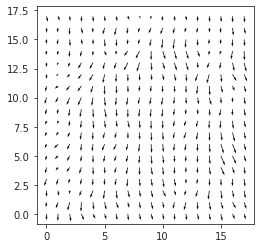

In [8]:
i = 9

fig, ax = create_figure()
ax.quiver(range(18), range(18), x[i, 0], x[i, 1])
ax_square(ax)

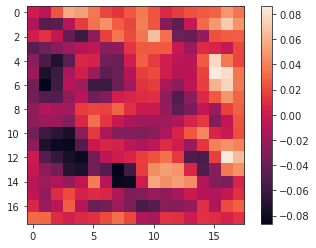

In [9]:
plt.imshow(x[i, 0])
plt.colorbar()

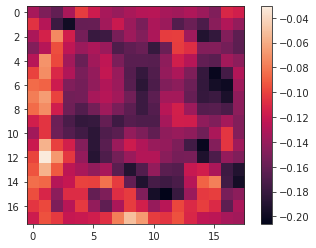

In [10]:
plt.imshow(x[i, 1])
plt.colorbar()

In [11]:
x = torch.randn((13, 2, 18, 18))
x.shape

torch.Size([13, 2, 18, 18])

In [12]:
y, s, log_p, log_q, kl_all, kl_diag = vae(x)

top

torch.Size([13, 20, 4, 4])

begin dec

torch.Size([13, 20, 4, 4])

torch.Size([13, 20, 4, 4])

torch.Size([13, 20, 4, 4])

torch.Size([13, 20, 8, 8])

torch.Size([13, 20, 8, 8])

torch.Size([13, 20, 8, 8])

torch.Size([13, 20, 8, 8])

post

In [13]:
y.shape

torch.Size([13, 2, 18, 18])

In [4]:
vae.stem_decoder

In [5]:
print(vae.dec_sampler)

ModuleList(
  (0): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (1): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (2): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(128, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (3): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (4): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (5): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 40, kernel_size=(1, 1), stride=(1, 1))
  )
  (6): Sequential(
    (0): ELU(alpha=1.0, inplace=True)
    (1): Conv2d(64, 40, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [16]:
print(vae.enc_sampler)

ModuleList(
  (0): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [17]:
vae = self = VAE(ConfigVAE(n_latent_scales=1, n_groups_per_scale=1))
vae.print()

2 after _init_pre()

2 after _init_enc()

2 after _init_enc0()

2 after _init_sampler()

2 after _init_dec()

1.0 after _init_post()

inside _init_output() 32 1.0

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
|     VAE      |  185.4 K   |
|     ---      |    ---     |
|     stem     |    104     |
|     pre      |  112.1 K   |
|     enc0     |   4.2 K    |
| enc_sampler  |   23.1 K   |
| dec_sampler  |     0      |
| stem_decoder |   1.3 K    |
|     post     |   39.9 K   |
|     out      |    616     |
+--------------+------------+

2 after _init_pre()

4 after _init_enc()

4 after _init_enc0()

4 after _init_sampler()

2.0 after _init_dec()

1.0 after _init_post()

inside _init_output() 32 1.0

top

torch.Size([13, 20, 4, 4])

begin dec

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 3 but got size 4 for tensor number 1 in the list.

In [15]:
vae.dec_tower

ModuleList(
  (0): DecCombiner(
    (conv): Conv2d(148, 128, kernel_size=(1, 1), stride=(1, 1))
  )
  (1): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=128, out_features=8, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=8, out_features=128, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (2): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=128, out_features=8, bias=True)
        (1): SiLU(inplace=True)
 

In [19]:
y.shape

torch.Size([13, 2, 18, 18])

In [20]:
print(vae.stem_decoder)

Conv2d(20, 64, kernel_size=(1, 1), stride=(1, 1))

In [21]:
vae.enc_sampler

ModuleList(
  (0): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [23]:
vae.sample(2120).shape

torch.Size([2120, 2, 18, 18])

In [22]:
c1 = nn.Conv2d(256, 40, 3, padding=1)
c2 = nn.Conv2d(256, 40, 4, padding=0)

In [23]:
x = torch.randn((13, 256, 4, 4))
y1 = c1(x)
y2 = c2(x)

x.shape, y1.shape, y2.shape

(torch.Size([13, 256, 4, 4]),
 torch.Size([13, 40, 4, 4]),
 torch.Size([13, 40, 1, 1]))

In [24]:
from utils.model import print_num_params

In [25]:
print_num_params(nn.ModuleList([c1, c2]))

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|  ModuleList |  256.1 K   |
|     ---     |    ---     |
|      0      |   92.2 K   |
|      1      |  163.9 K   |
+-------------+------------+

In [26]:
self.z0_sz

[20, 4, 4]

In [28]:
device = torch.device('cuda:1')

In [30]:
device?

In [31]:
torch.device

torch.device

In [32]:
type(device)

torch.device

In [ ]:
def sample(self, n: int, t: float):
    scale_ind = 0
    z0_size = [n] + self.z0_size
    dist = Normal(
        mu=torch.zeros(z0_size).cuda(),
        logsigma=torch.zeros(z0_size).cuda(),
        temp=t,
    )
    z, _ = dist.sample()

    idx = 0
    s = self.prior_ftr0.unsqueeze(0)
    s = s.expand(z.size(0), -1, -1, -1)
    for cell in self.dec_tower:
        if isinstance(cell, DecCombiner):
            if idx > 0:
                # form prior
                param = self.dec_sampler[idx - 1](s)
                mu, logsigma = torch.chunk(param, 2, dim=1)
                dist = Normal(mu, logsigma, t)
                z, _ = dist.sample()

            # 'combiner_dec'
            s = cell(s, z)
            idx += 1
        else:
            s = cell(s)
            if cell.cell_type == 'up_dec':
                scale_ind += 1

    for cell in self.post:
        s = cell(s)

    return self.out(s), s

In [10]:
print(vae.enc_sampler)

ModuleList(
  (0): Conv(
    (conv): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (1): Conv(
    (conv): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (2): Conv(
    (conv): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (3): Conv(
    (conv): Conv2d(128, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (4): Conv(
    (conv): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (5): Conv(
    (conv): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (6): Conv(
    (conv): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (7): Conv(
    (conv): Conv2d(64, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)

In [11]:
print(vae.enc_tower)

ModuleList(
  (0): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (1): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (2): EncCombiner(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
  )
  (3): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (4): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (5): EncCombiner(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
  )
  (6): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (7): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): Conv(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
     

In [14]:
x.shape == y.shape

True

In [37]:
conv_t = nn.ConvTranspose2d(64, 2, 3, stride=1)

In [38]:
conv_t(s).shape

torch.Size([13, 2, 18, 18])

In [39]:
conv_t.weight.shape

torch.Size([64, 2, 3, 3])

In [40]:
vae.stem.weight.shape

torch.Size([8, 2, 3, 3])

In [10]:
vae.post

ModuleList(
  (0): Cell(
    (skip): Sequential(
      (0): Upsample(scale_factor=2.0, mode=bilinear)
      (1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (ops): ModuleList(
      (0): Conv2d(
        (upsample): Upsample(scale_factor=2.0, mode=bilinear)
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (1): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): Conv2d(
        (act_fn): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
  

In [6]:
vae.cfg.groups

[4, 2]

In [7]:
y.shape

torch.Size([13, 2, 16, 16])

In [8]:
s.shape

torch.Size([13, 64, 16, 16])

In [15]:
len(kl_all), len(kl_diag)

(6, 6)

In [20]:
kl_all[0].shape, kl_diag[0].shape

(torch.Size([13]), torch.Size([20]))

In [23]:
conv = nn.Conv2d(32, 64, 2, padding=0)

In [24]:
x = torch.randn((13, 32, 2, 2))
x.shape, conv(x).shape

(torch.Size([13, 32, 2, 2]), torch.Size([13, 64, 1, 1]))

torch.Size([13, 64, 16, 16])

In [6]:
print(vae)

VAE(
  (stem): RotConv2d(2, 8, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (pre): ModuleList()
  (enc_tower): ModuleList(
    (0): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0): Conv2d(
          (act_fn): SiLU(inplace=True)
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (1): Conv2d(
          (act_fn): SiLU(inplace=True)
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): SiLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (1): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0): Conv2d(
          (act_fn): SiLU(inplace=True)
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (1): Conv2d(
          (act_fn): SiLU(inplace=True)
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): SiLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (2): EncCombiner(
      (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (3): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0): Conv2d(
          (act_fn): SiLU(inplace=True)
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (1): Conv2d(
          (act_fn): SiLU(inplace=True)
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): SiLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (4): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0): Conv2d(
          (act_fn): SiLU(inplace=True)
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (1): Conv2d(
          (act_fn): SiLU(inplace=True)
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): SiLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (5): EncCombiner(
      (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (6): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0): Conv2d(
          (act_fn): SiLU(inplace=True)
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (1): Conv2d(
          (act_fn): SiLU(inplace=True)
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): SiLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (7): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0): Conv2d(
          (act_fn): SiLU(inplace=True)
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (1): Conv

In [18]:
for net in vae.enc:
    x = net(x)
    print(x.shape)

torch.Size([13, 64, 16, 16])

torch.Size([13, 64, 16, 16])

TypeError: forward() missing 1 required positional argument: 'x2'

In [14]:
input_sz = self.cfg.input_sz - self.cfg.ker_sz + 1
input_sz

16

In [15]:
self.stem.out_channels * self.stem.n_rots

64

In [16]:
_MULT = 2

In [22]:
c_scaling = _MULT ** (
        self.cfg.n_pre_blocks +
        self.cfg.n_latent_scales - 1
)
c_scaling

2

In [23]:
s_scaling = 2 ** (
    self.cfg.n_pre_blocks +
    self.cfg.n_latent_scales - 1
)
s_scaling

2

In [24]:
[
    self.cfg.n_latent_per_group,
    input_sz // s_scaling,
    input_sz // s_scaling,
]

[20, 8, 8]

In [25]:
[
    c_scaling * self.n_ch,
    input_sz // s_scaling,
    input_sz // s_scaling,
]

[128, 8, 8]

In [ ]:
# input_sz = self.cfg.input_sz - self.cfg.ker_sz + 1
# self.n_ch = self.stem.out_channels * self.stem.n_rots
# c_scaling = _MULT ** (
# self.cfg.n_pre_blocks +
#         self.cfg.n_latent_scales - 1
# )
# s_scaling = 2 ** (
#         self.cfg.n_pre_blocks +
##         self.cfg.n_latent_scales - 1
# )
self.z0_sz = [
    self.cfg.n_latent_per_group,
    input_sz // s_scaling,
    input_sz // s_scaling,
]
prior_ftr0_sz = (
    c_scaling * self.n_ch,
    input_sz // s_scaling,
    input_sz // s_scaling,
)
self.prior_ftr0 = nn.Parameter(
    data=torch.rand(prior_ftr0_sz),
    requires_grad=True,
)

torch.Size([13, 32, 16, 16])

torch.Size([13, 32, 16, 16])

torch.Size([13, 64, 8, 8])

torch.Size([13, 64, 8, 8])

torch.Size([13, 64, 8, 8])

torch.Size([13, 128, 4, 4])

In [8]:
print(vae.stem)

RotConv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=valid)

In [9]:
print(vae.pre)

ModuleList(
  (0): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): BNSwishConv(
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=32, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=32, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (1): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): BNSwishConv(
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=32, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=32, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (2): Cell(
    (skip): FactorizedReduce(
      (swish): SiLU(inplace=True)
      (ops): ModuleList(
        (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (2): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (3): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      )
    )
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      )
      (1): BNSwishConv(
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (3): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): BNSwishConv(
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (4): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=T

In [10]:
print(vae.enc)

ModuleList(
  (0): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): BNSwishConv(
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=128, out_features=8, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=8, out_features=128, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (1): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): BNSwishConv(
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=128, out_features=8, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=8, out_features=128, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (2): EncCombiner(
    (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
  )
  (3): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): BNSwishConv(
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=128, out_features=8, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=8, out_features=128, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (4): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): BNSwishConv(
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=128, out_features=8, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=8, out_features=128, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (5): EncCombiner(
    (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
  )
  (6): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): BNSwishConv(
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, a

In [11]:
print(vae.enc0)

Sequential(
  (0): ELU(alpha=1.0, inplace=True)
  (1): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
  (2): ELU(alpha=1.0, inplace=True)
)

In [12]:
print(vae.dec)

ModuleList(
  (0): DecCombiner(
    (conv): Conv2d(276, 256, kernel_size=(1, 1), stride=(1, 1))
  )
  (1): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=256, out_features=16, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=16, out_features=256, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (2): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=256, out_features=16, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=16, out_features=256, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (3): DecCombiner(
    (conv): Conv2d(276, 256, kernel_size=(1, 1), stride=(1, 1))
  )
  (4): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=256, out_features=16, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=16, out_features=256, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (5): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=256, out_features=16, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=16, out_features=256, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (6): DecCombiner(
    (conv): Conv2d(276, 256, kernel_size=(1, 1), stride=(1, 1))
  )
  (7): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=256, out_features=16, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=16, out_features=256, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (8): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=256, out_features=16, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=16, out_features=256, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (9): DecCombiner(
    (conv): Conv2d(276, 256, kernel_size=(1,

In [13]:
print(vae.post)

ModuleList(
  (0): Cell(
    (skip): Sequential(
      (0): Upsample(scale_factor=2.0, mode=nearest)
      (1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, 
track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (1): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (2): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=64, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=64, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (3): Cell(
    (skip): Sequential(
      (0): Upsample(scale_factor=2.0, mode=nearest)
      (1): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
    )
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=32, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=32, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (4): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=32, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=32, bias=True)
        (3): Sigmoid()
      )
    )
  )
  (5): Cell(
    (skip): Identity()
    (ops): ModuleList(
      (0): BNSwishConv(
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (swish): SiLU(inplace=True)
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (se): SELayer(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=32, out_features=4, bias=True)
        (1): SiLU(inplace=True)
        (2): Linear(in_features=4, out_features=32, bias=True)
        (3): Sigmoid()
      )
    )
  )
)

In [6]:
self.z0_sz

[20, 2, 2]

In [15]:
self.cfg.n_pre_blocks, self.cfg.n_pre_cells

(2, 3)

## AdaptiveAvgPool3d

In [16]:
pool = nn.AdaptiveAvgPool2d(1)
x = torch.randn((13, 64, 32, 32))
x.shape

torch.Size([13, 64, 32, 32])

In [17]:
y = pool(x)
y.shape

torch.Size([13, 64, 1, 1])

## Interpolate

In [18]:
from sklearn.datasets import load_sample_image
flower = load_sample_image('flower.jpg').astype(float)

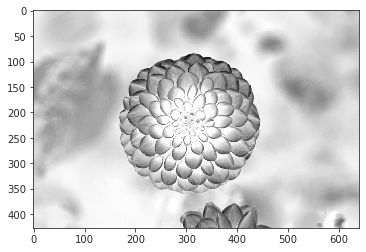

In [19]:
plt.imshow(flower[..., 2], cmap='Greys');

In [20]:
data = torch.tensor(flower[..., 2]).view(1, 1, 1, 427, 640)
up = F.interpolate(data, scale_factor=2, mode='nearest')
up.shape

torch.Size([1, 1, 2, 854, 1280])

In [21]:
up = up.detach().numpy().squeeze()
up.shape

(2, 854, 1280)

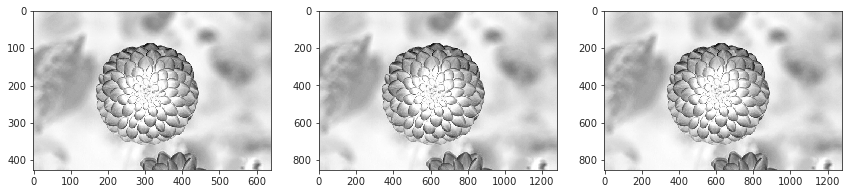

In [22]:
fig, axes = create_figure(1, 3, (14.5, 4))

axes[0].imshow(flower[..., 2], cmap='Greys')
axes[1].imshow(up[0], cmap='Greys')
axes[2].imshow(up[0], cmap='Greys')
plt.show()

In [24]:
class UpSample(nn.Module):
	def __init__(self, **kwargs):
		super(UpSample, self).__init__()
		defaults = {
			'scale_factor': 2,
			'mode': 'bilinear',
			'align_corners': True,
			'antialias': False,
		}
		kwargs = setup_kwargs(defaults, kwargs)
		self.kwargs = filter_kwargs(F.interpolate, kwargs)

	def forward(self, x):
		return F.interpolate(x, **self.kwargs)

In [25]:
up = UpSample()

In [32]:
data = torch.tensor(flower[..., 2]).view(1, 1, 427, 640)
data.shape

torch.Size([1, 1, 427, 640])

In [33]:
up(data).shape

torch.Size([1, 1, 854, 1280])

In [35]:
data = torch.tensor(flower[..., 2]).view(1, 1, 427, 640)
up = F.interpolate(data, scale_factor=2, mode='nearest')
up.shape

torch.Size([1, 1, 854, 1280])

In [21]:
up = up.detach().numpy().squeeze()
up.shape

(2, 854, 1280)

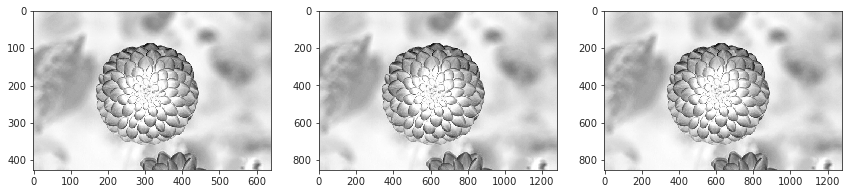

In [22]:
fig, axes = create_figure(1, 3, (14.5, 4))

axes[0].imshow(flower[..., 2], cmap='Greys')
axes[1].imshow(up[0], cmap='Greys')
axes[2].imshow(up[0], cmap='Greys')
plt.show()

## VAE

In [28]:
from model.common import Module, conv1x1x1, conv3x3x3, get_init_fn, add_sn, add_wn
from model.vae import RotConv3d, Cell, EncCombiner, DecCombiner

In [46]:
vae = VAE(ConfigVAE(n_groups_per_scale=4))

In [47]:
vae.print()

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |   42.5 M   |
|     ---     |    ---     |
|     stem    |    248     |
|     pre     |   1.7 M    |
|     enc     |   25.0 M   |
|     enc0    |   65.8 K   |
|     dec     |   15.8 M   |
+-------------+------------+

In [49]:
vae.cfg.groups

[4, 2]

In [5]:
vae.print()

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|     VAE     |   58.9 M   |
|     ---     |    ---     |
|     stem    |    248     |
|     pre     |   1.7 M    |
|     enc     |   57.2 M   |
+-------------+------------+

In [6]:
from utils.model import print_num_params
print_num_params(vae.enc)

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|  ModuleList |   57.2 M   |
|     ---     |    ---     |
|      0      |  887.7 K   |
|      1      |  887.7 K   |
|      2      |   16.5 K   |
|      3      |  887.7 K   |
|      4      |  887.7 K   |
|      5      |   16.5 K   |
|      6      |  887.7 K   |
|      7      |  887.7 K   |
|      8      |   16.5 K   |
|      9      |  887.7 K   |
|      10     |  887.7 K   |
|      11     |   16.5 K   |
|      12     |  887.7 K   |
|      13     |  887.7 K   |
|      14     |   16.5 K   |
|      15     |  887.7 K   |
|      16     |  887.7 K   |
|      17     |   16.5 K   |
|      18     |  887.7 K   |
|      19     |  887.7 K   |
|      20     |   16.5 K   |
|      21     |  887.7 K   |
|      22     |  887.7 K   |
|      23     |   16.5 K   |
|      24     |  887.7 K   |
|      25     |  887.7 K   |
|      26     |   16.5 K   |
|      27     |  887.7 K   |
|      28     |  887.7 K   |
|      29     |   16.5 K   |
|      30     |   3.5 M    |
|      31     |   3.5 M    |
|      32     |   3.5 M    |
|      33     |   65.8 K   |
|      34     |   3.5 M    |
|      35     |   3.5 M    |
|      36     |   65.8 K   |
|      37     |   3.5 M    |
|      38     |   3.5 M    |
|      39     |   65.8 K   |
|      40     |   3.5 M    |
|      41     |   3.5 M    |
|      42     |   65.8 K   |
|      43     |   3.5 M    |
|      44     |   3.5 M    |
+-------------+------------+

In [7]:
x = torch.randn((13, 2, 24, 16, 16))
x.shape

torch.Size([13, 2, 24, 16, 16])

In [8]:
y = vae.stem(x)
y.shape

torch.Size([13, 32, 24, 16, 16])

In [9]:
for op in vae.pre:
    y = op(y)
    print(y.shape)

torch.Size([13, 32, 24, 16, 16])

torch.Size([13, 32, 24, 16, 16])

torch.Size([13, 64, 12, 8, 8])

torch.Size([13, 64, 12, 8, 8])

torch.Size([13, 64, 12, 8, 8])

torch.Size([13, 128, 6, 4, 4])

In [10]:
y.shape

torch.Size([13, 128, 6, 4, 4])

In [17]:
vae.z0_sz

[20, 2, 2]

In [43]:
class FactorizedReduce(nn.Module):
    def __init__(self, ci: int, co: int, dim: int = 2):
        super(FactorizedReduce, self).__init__()
        n_ops = 2 ** dim
        assert co % 2 == 0 and co > n_ops
        kwargs = {
            'ci': ci,
            'co': co//n_ops,
            'stride': 2,
            'padding': 1,
            'bias': True,
        }
        self.swish = nn.SiLU(inplace=True)
        self.ops = nn.ModuleList()
        for i in range(n_ops - 1):
            if dim == 2:
                self.ops.append(conv3x3(**kwargs))
            else:
                self.ops.append(conv3x3x3(**kwargs))
        kwargs['co'] = co - len(self.ops) * (co//n_ops)
        if dim == 2:
            self.ops.append(conv3x3(**kwargs))
        else:
            self.ops.append(conv3x3x3(**kwargs))

    def forward(self, x):
        x = self.swish(x)
        y = []
        for ii, op in enumerate(self.ops, start=1):
            i, j, k = base2(len(self.ops) - ii)
            y.append(op(x[..., i:, j:, k:]))
            print(i, j, k)
        return torch.cat(y, dim=1)

In [44]:
fr = FactorizedReduce(64, 128, 2)

In [45]:
x = torch.randn((13, 64, 16, 16))
y = fr(x)

0 1 1

0 1 0

0 0 1

0 0 0

In [46]:
x.shape, y.shape

(torch.Size([13, 64, 16, 16]), torch.Size([13, 128, 8, 8]))

In [42]:
print(fr)

FactorizedReduce(
  (swish): SiLU(inplace=True)
  (ops): ModuleList(
    (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (2): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
)

In [47]:
class Conv2D(nn.Conv2d):
    """Allows for weights as input."""

    def __init__(self, C_in, C_out, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=False, data_init=False,
                 weight_norm=True):
        """
        Args:
            use_shared (bool): Use weights for this layer or not?
        """
        super(Conv2D, self).__init__(C_in, C_out, kernel_size, stride, padding, dilation, groups, bias)

        self.log_weight_norm = None
        if weight_norm:
            init = norm(self.weight, dim=[1, 2, 3]).view(-1, 1, 1, 1)
            self.log_weight_norm = nn.Parameter(torch.log(init + 1e-2), requires_grad=True)

        self.data_init = data_init
        self.init_done = False
        self.weight_normalized = self.normalize_weight()

    def forward(self, x):
        """
        Args:
            x (torch.Tensor): of size (B, C_in, H, W).
            params (ConvParam): containing `weight` and `bias` (optional) of conv operation.
        """
        # do data based initialization
        if self.data_init and not self.init_done:
            with torch.no_grad():
                weight = self.weight / (norm(self.weight, dim=[1, 2, 3]).view(-1, 1, 1, 1) + 1e-5)
                bias = None
                out = F.conv2d(x, weight, bias, self.stride, self.padding, self.dilation, self.groups)
                mn = torch.mean(out, dim=[0, 2, 3])
                st = 5 * torch.std(out, dim=[0, 2, 3])

                # get mn and st from other GPUs
                average_tensor(mn, is_distributed=True)
                average_tensor(st, is_distributed=True)

                if self.bias is not None:
                    self.bias.data = - mn / (st + 1e-5)
                self.log_weight_norm.data = -torch.log((st.view(-1, 1, 1, 1) + 1e-5))
                self.init_done = True

        self.weight_normalized = self.normalize_weight()

        bias = self.bias
        return F.conv2d(x, self.weight_normalized, bias, self.stride,
                        self.padding, self.dilation, self.groups)

    def normalize_weight(self):
        """ applies weight normalization """
        if self.log_weight_norm is not None:
            weight = normalize_weight_jit(self.log_weight_norm, self.weight)
        else:
            weight = self.weight

        return weight

In [51]:
def norm(t, dim):
    return torch.sqrt(torch.sum(t * t, dim))

@torch.jit.script
def normalize_weight_jit(log_weight_norm, weight):
    n = torch.exp(log_weight_norm)
    wn = torch.sqrt(torch.sum(weight * weight, dim=[1, 2, 3]))   # norm(w)
    weight = n * weight / (wn.view(-1, 1, 1, 1) + 1e-5)
    return weight

In [55]:
conv = Conv2D(64, 32, 1, stride=2, padding=0, bias=True)
print(conv)

Conv2D(64, 32, kernel_size=(1, 1), stride=(2, 2))

In [53]:
conv(x).shape

torch.Size([13, 32, 8, 8])

In [54]:
conv.padding

(0, 0)

In [60]:
F.conv2d(x, conv.weight, bias=conv.bias, stride=2, padding=0).shape

torch.Size([13, 32, 8, 8])

In [67]:
conv2 = nn.Conv2d(64, 32, 3, 2, padding=1)
conv2(x).shape

torch.Size([13, 32, 8, 8])

In [69]:
self.n_ch

32

## Upsample

In [8]:
def show_velocity(v, cmap='Spectral_r', grid=False):
    rho, phi = vel2polar(v)
    vminmax = np.max(np.abs(v))
    kws = dict(
        cmap='bwr',
        vmax=vminmax,
        vmin=-vminmax,
    )
    fig, axes = create_figure(1, 4, (12, 2.5), 'all', 'all', tight_layout=True)
    im = axes[0].imshow(v[..., 0], **kws)
    plt.colorbar(im, ax=axes[0])
    axes[0].set_title(r'$v_x$', y=1.02, fontsize=17)

    im = axes[1].imshow(v[..., 1], **kws)
    plt.colorbar(im, ax=axes[1])
    axes[1].set_title(r'$v_y$', y=1.02, fontsize=17)

    im = axes[2].imshow(rho, cmap=cmap)
    plt.colorbar(im, ax=axes[2])
    axes[2].set_title(r'$\rho$', y=1.02, fontsize=17)

    im = axes[3].imshow(phi, cmap='hsv', vmin=0, vmax=2*np.pi)
    plt.colorbar(im, ax=axes[3])
    axes[3].set_title(r'$\phi$', y=1.02, fontsize=14)

    axes[-1].invert_yaxis()
    for ax in axes.flat:
        ax.tick_params(labelsize=10)
        ax.set(
            xticks=of.ticks,
            yticks=of.ticks,
            xticklabels=of.ticklabels,
            yticklabels=of.ticklabels,
        )
    if grid:
        add_grid(axes)
    plt.show()


from skimage.transform import resize

def show_opticflow(v):
    fig, axes = create_figure(1, 3, (12, 4), constrained_layout=True)
    axes[0].quiver(
        range(-2, 2 + 1),
        range(-2, 2 + 1),
        resize(v[..., 0], (4+1,) * 2),
        resize(v[..., 1], (4+1,) * 2),
        # scale=150,
    )
    axes[1].quiver(
        range(-4, 4 + 1),
        range(-4, 4 + 1),
        resize(v[..., 0], (8+1,) * 2),
        resize(v[..., 1], (8+1,) * 2),
        # scale=100,
    )
    axes[2].quiver(
        range(-8, 8 + 1),
        range(-8, 8 + 1),
        resize(v[..., 0], (16+1,) * 2),
        resize(v[..., 1], (16+1,) * 2),
        # scale=100,
    )
    ax_square(axes)
    plt.show()

In [10]:
from model.opticflow import *

In [11]:
fix = np.array([
    [0.4, 0],
    [0, 0.4],
])
obj_pos = np.array([
    [-0.2, 0, 1.0],
]).T
obj_vel = np.array([
    [9.5, 4.7, 0],
]).T
vel = np.array([
    [5, 5, 0],
    [1, -2, 0],
    [3, 3, 1],
]).T

fov = 45
res = 1
of = OpticFlow(fov, res).compute_coords(fix)
alpha_dot = of.compute_flow(vel, obj_pos, obj_vel)
alpha_dot.shape

(2, 91, 91, 2, 3, 1)

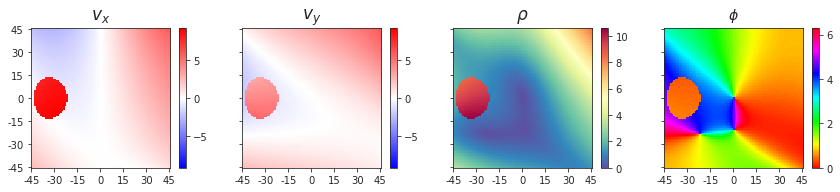

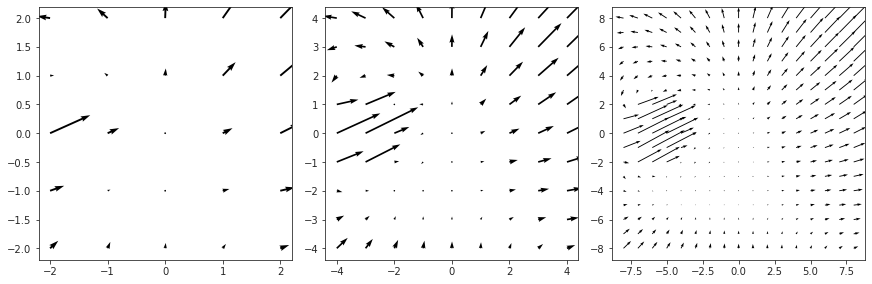

In [13]:
i, j, k = 0, 0, 0
show_velocity(alpha_dot[i, ..., j, k])
show_opticflow(alpha_dot[i, ..., j, k])

In [51]:
42 / 3

14.0

In [58]:
fov = 42
res = 14
of = OpticFlow(fov, res).compute_coords(fix)
alpha_dot = of.compute_flow(vel, obj_pos, obj_vel)
alpha_dot[i, ..., j, k].shape

(7, 7, 2)

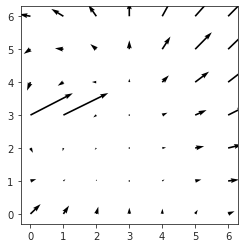

In [59]:
fig, ax = create_figure()
ax.quiver(range(7), range(7), alpha_dot[i, ..., 0, j, k], alpha_dot[i, ..., 1, j, k])
ax_square(ax)
plt.show()

In [60]:
x = torch.tensor(np.transpose(alpha_dot[i, ..., j, k], (2, 0, 1))).unsqueeze(0)
x.shape

torch.Size([1, 2, 7, 7])

In [75]:
up_nearest = nn.Upsample(size=15, mode='nearest')
up_noaling = nn.Upsample(size=15, mode='bilinear', align_corners=False)
up_aling = nn.Upsample(size=15, mode='bilinear', align_corners=True)

In [76]:
y_nearest = up_nearest(x)
y_noaling = up_noaling(x)
y_aling = up_aling(x)

In [77]:
y_nearest.shape

torch.Size([1, 2, 15, 15])

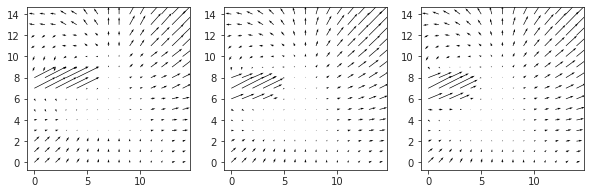

In [78]:
fig, axes = create_figure(1, 3, (10, 3))
axes[0].quiver(range(15), range(15), y_nearest[0, 0], y_nearest[0, 1])
axes[1].quiver(range(15), range(15), y_noaling[0, 0], y_noaling[0, 1])
axes[2].quiver(range(15), range(15), y_aling[0, 0], y_aling[0, 1])
ax_square(axes)
plt.show()

In [79]:
42 / 14

3.0

In [80]:
of = OpticFlow(fov, 6).compute_coords(fix)
alpha_dot_up = of.compute_flow(vel, obj_pos, obj_vel)
alpha_dot_up.shape

(2, 15, 15, 2, 3, 1)

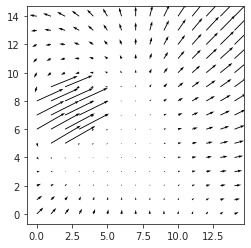

In [81]:
fig, ax = create_figure()
ax.quiver(range(15), range(15), alpha_dot_up[i, ..., 0, j, k], alpha_dot_up[i, ..., 1, j, k])
ax_square(ax)
plt.show()

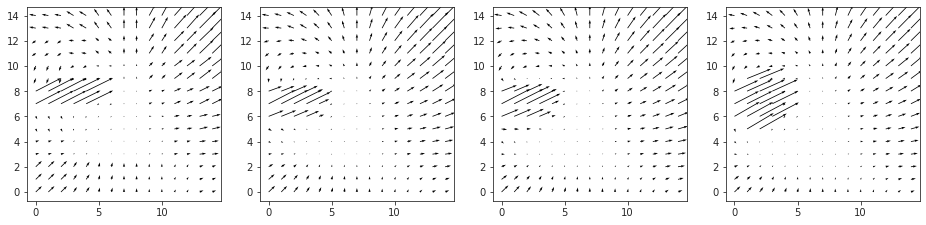

In [83]:
fig, axes = create_figure(1, 4, (16, 5))
axes[0].quiver(range(15), range(15), y_nearest[0, 0], y_nearest[0, 1])
axes[1].quiver(range(15), range(15), y_noaling[0, 0], y_noaling[0, 1])
axes[2].quiver(range(15), range(15), y_aling[0, 0], y_aling[0, 1])
axes[3].quiver(range(15), range(15), alpha_dot_up[i, ..., 0, j, k], alpha_dot_up[i, ..., 1, j, k])
ax_square(axes)
plt.show()

In [84]:
alpha_dot_up[i, ..., j, k].shape

(15, 15, 2)

In [87]:
delta_noaling = alpha_dot_up[i, ..., j, k] - np.transpose(y_noaling.detach().numpy()[0], (1, 2, 0))
delta_aling = alpha_dot_up[i, ..., j, k] - np.transpose(y_aling.detach().numpy()[0], (1, 2, 0))
delta_nearest = alpha_dot_up[i, ..., j, k] - np.transpose(y_nearest.detach().numpy()[0], (1, 2, 0))

In [93]:
(delta_noaling ** 2).sum() / 15 / 15, (delta_aling ** 2).sum() / 15 / 15, (delta_nearest ** 2).sum() / 15 / 15

(2.831316009081514, 2.4759771450439554, 5.119581100159294)